Write to csv  

open with libre  

see whats up with the dfs columns

maybe drop dfs column and calculate our own

need to drop Gtm

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import re
from calendar import month_abbr

def br_scrapper(player, pos, year):
    url = "https://www.baseball-reference.com/players/gl.fcgi?id={}&t={}&year={}".format(player, pos, year)
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page,'html.parser')
    
    header = soup.find('table', id="batting_gamelogs").find('thead').find('tr').text.split('\n')
    #header = soup.find('table', id="batting_gamelogs").find('tr').text.split('\n')
    header = header[2:-1] # drop first and last item
    header = ['team_homeORaway' if x=='' else x for x in header]
    
    table = soup.find('table', id="batting_gamelogs")
    table_rows = table.find('tbody').find_all('tr', id=re.compile("batting_gamelogs.\d{4}"))
    #table_rows
    
    data = []
    for row in table_rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)
    
    player_name = soup.find('div', itemtype='https://schema.org/Person').find('h1').text
    bats = soup.find('div', itemtype = 'https://schema.org/Person').text.split('\n')[8].split(':')[1].strip()
    
    data = pd.DataFrame(data=data, columns = header)
    
    data['Yr'] = year
    data['Player'] = player_name
    data['Bats'] = bats
    data['Month'] = data['Date'].str.split(" ").str[0]
    data['Day'] = data['Date'].str.split(" ").str[1]
    
    month_dict = dict((v,k) for k,v in enumerate(month_abbr))
    
    mth = []
    for i in data['Month']:
        mth.append(month_dict[i])
    
    data['Month'] = mth
    data['Day'] = data['Day'].astype(str).astype(int)
    
    data['dt'] = pd.to_datetime(data['Yr']*10000+data['Month']*100+data['Day'], format = '%Y%m%d')
    
    # data = data.drop(["Yr", "Month", "Day"], axis=1)
    
    data = data.drop(['DFS(DK)', 'DFS(FD)'], axis = 1)
    
    data[['AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB','IBB', 
          'SO', 'HBP', 'SH', 'SF', 'ROE', 'GDP', 'SB', 'SB', 'CS','BOP']] = data[['AB', 'R', 'H', '2B', '3B',
                                                                               'HR', 'RBI', 'BB', 'IBB',
                                                                               'SO', 'HBP', 'SH', 'SF', 'ROE',
                                                                               'GDP', 'SB', 'SB', 'CS', 'BOP']].astype(int)
    data[['BA', 'OBP', 'SLG', 'OPS','aLI', 'WPA', 'RE24']] = data[['BA', 'OBP', 'SLG', 'OPS','aLI', 'WPA', 'RE24']].astype(float)

    
    if pos == 'b':
        data['DFS(DK)'] = (data['H'] - data['2B'] - data['3B'] - data['HR'])*3 + data['2B']*5 + data['3B']*8 + data['HR']*10 + data['RBI']*2 + data['R']*2 + data['BB']*2 + data['HBP']*2 + data['SB']*5
        data['DFS(FD)'] = (data['H'] - data['2B'] - data['3B'] - data['HR'])*3 + data['2B']*6 + data['3B']*9 + data['HR']*12 + data['RBI']*3.5 + data['R']*3.2 + data['BB']*3 + data['HBP']*3 + data['SB']*6
    
    return(data)
    

In [2]:
test_df = br_scrapper('troutmi01', 'b', 2019)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 43 columns):
Gcar               84 non-null object
Gtm                84 non-null object
Date               84 non-null object
Tm                 84 non-null object
team_homeORaway    84 non-null object
Opp                84 non-null object
Rslt               84 non-null object
Inngs              84 non-null object
PA                 84 non-null object
AB                 84 non-null int32
R                  84 non-null int32
H                  84 non-null int32
2B                 84 non-null int32
3B                 84 non-null int32
HR                 84 non-null int32
RBI                84 non-null int32
BB                 84 non-null int32
IBB                84 non-null int32
SO                 84 non-null int32
HBP                84 non-null int32
SH                 84 non-null int32
SF                 84 non-null int32
ROE                84 non-null int32
GDP                84 non-null int32


In [3]:
test_df

,Gcar,Gtm,Date,Tm,team_homeORaway,Opp,Rslt,Inngs,PA,AB,...,RE24,Pos,Yr,Player,Bats,Month,Day,dt,DFS(DK),DFS(FD)
0,1066,1,Mar 28,LAA,@,OAK,"L,0-4",CG,4,3,...,0.23,CF,2019,Mike Trout,Right,3,28,2019-03-28,5,6.0
1,1067,2,Mar 29,LAA,@,OAK,"W,6-2",CG,5,4,...,2.17,CF,2019,Mike Trout,Right,3,29,2019-03-29,16,22.2
2,1068,3,Mar 30,LAA,@,OAK,"L,2-4",CG,4,3,...,-0.09,CF,2019,Mike Trout,Right,3,30,2019-03-30,7,9.5
3,1069,4,Mar 31,LAA,@,OAK,"L,1-2",CG,4,2,...,0.38,DH,2019,Mike Trout,Right,3,31,2019-03-31,9,12.0
4,1070,5,Apr 1,LAA,@,SEA,"L,3-6",CG,4,2,...,0.57,CF,2019,Mike Trout,Right,4,1,2019-04-01,4,6.0
5,1071,6,Apr 2,LAA,@,SEA,"L,1-2",CG,4,3,...,0.31,CF,2019,Mike Trout,Right,4,2,2019-04-02,5,6.0
6,1072,7,Apr 4,LAA,,TEX,"L,4-11",GS-9,4,3,...,1.42,CF,2019,Mike Trout,Right,4,4,2019-04-04,19,24.7
7,1073,8,Apr 5,LAA,,TEX,"W,3-1",CG,4,4,...,0.87,CF,2019,Mike Trout,Right,4,5,2019-04-05,28,37.4
8,1074,9,Apr 6,LAA,,TEX,"W,5-1",CG,5,2,...,3.42,CF,2019,Mike Trout,Right,4,6,2019-04-06,26,38.2
9,1075,10,Apr 7,LAA,,TEX,"W,7-2",CG,5,2,...,2.27,CF,2019,Mike Trout,Right,4,7,2019-04-07,22,31.2


# Rolling Mean

In [177]:
dfs_pts = test_df['DFS(DK)']
mavg = dfs_pts.rolling(window=10).mean()

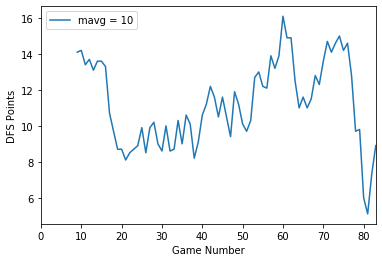

Mike Trout Daily Moving Average of Fantasy Points on DraftKings in 2019


In [179]:
dfs_graph = mavg.plot(label='mavg = 10')
dfs_graph.set_xlabel('Game Number')
dfs_graph.set_ylabel('DFS Points')
dfs_graph.legend()
plt.show()
print('Mike Trout Daily Moving Average of Fantasy Points on DraftKings in 2019')


# Exponential Smoothing

https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1

https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [72]:
import matplotlib.pyplot as plt

In [100]:
SES_df = pd.DataFrame(data=test_df['DFS(DK)'])
SES_df = SES_df.set_index(test_df['dt'])
SES_df['DFS(DK)'] = SES_df['DFS(DK)'].astype(float)
SES_df.head()

,DFS(DK)
dt,
2019-03-28,5.0
2019-03-29,16.0
2019-03-30,7.0
2019-03-31,9.0
2019-04-01,4.0


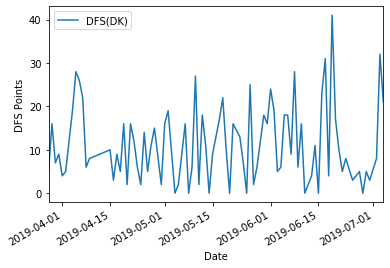

Mike Trout Daily Fantasy Points on DraftKings in 2019


In [101]:
ax = SES_df.plot()
ax.set_xlabel('Date')
ax.set_ylabel('DFS Points')
plt.show()
print('Mike Trout Daily Fantasy Points on DraftKings in 2019')

In [102]:
fit1 = SimpleExpSmoothing(SES_df).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(1).rename(r'$\alpha=0.2$')

fit2 = SimpleExpSmoothing(SES_df).fit(smoothing_level=0.4, optimized=False)
fcast2 = fit2.forecast(1).rename(r'$\alpha=0.4$')

fit3 = SimpleExpSmoothing(SES_df).fit(smoothing_level=0.6, optimized=False)
fcast3 = fit3.forecast(1).rename(r'$\alpha=0.6$')

fit4 = SimpleExpSmoothing(SES_df).fit(smoothing_level=0.8, optimized=False)
fcast4 = fit4.forecast(1).rename(r'$\alpha=0.8$')

fit5 = SimpleExpSmoothing(SES_df).fit(smoothing_level=1.0, optimized=False)
fcast5 = fit5.forecast(1).rename(r'$\alpha=1.0$')

fit6 = SimpleExpSmoothing(SES_df).fit()
fcast6 = fit6.forecast(1).rename(r'$\alpha=%s$'%fit6.model.params['smoothing_level'])

C:\Users\Nicholas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Nicholas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Nicholas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Nicholas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is availabl

In [103]:
ax = SES_df.plot(marker='o', color='black', figsize=(12,8))

fcast1.plot(marker='o', color='blue', legend=True)
#fit1.fittedvalues.plot(marker='o',  color='blue')

fcast2.plot(marker='o', color='red', legend=True)
#fit2.fittedvalues.plot(marker='o',  color='red')

fcast3.plot(marker='o', color='green', legend=True)
#fit3.fittedvalues.plot(marker='o',  color='green')

fcast4.plot(marker='o', color='yellow', legend=True)
#fit4.fittedvalues.plot(marker='o',  color='yellow')

fcast5.plot(marker='o', color='orange', legend=True)
#fit5.fittedvalues.plot(marker='o',  color='orange')

fcast6.plot(marker='o', color='purple', legend=True).set_xlim(0,90)
#fit6.fittedvalues.plot(marker='o',  color='purple')

plt.show()

ValueError: year 0 is out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002784D0E9268> (for post_execute):


ValueError: year 0 is out of range

ValueError: year 0 is out of range

In [110]:
fit1 = SimpleExpSmoothing(test_df['DFS(DK)']).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(1).rename(r'$\alpha=0.2$')

fit2 = SimpleExpSmoothing(test_df['DFS(DK)']).fit(smoothing_level=0.4, optimized=False)
fcast2 = fit2.forecast(1).rename(r'$\alpha=0.4$')

fit3 = SimpleExpSmoothing(test_df['DFS(DK)']).fit(smoothing_level=0.6, optimized=False)
fcast3 = fit3.forecast(1).rename(r'$\alpha=0.6$')

fit4 = SimpleExpSmoothing(test_df['DFS(DK)']).fit(smoothing_level=0.8, optimized=False)
fcast4 = fit4.forecast(1).rename(r'$\alpha=0.8$')

fit5 = SimpleExpSmoothing(test_df['DFS(DK)']).fit(smoothing_level=1.0, optimized=False)
fcast5 = fit5.forecast(1).rename(r'$\alpha=1.0$')

fit6 = SimpleExpSmoothing(test_df['DFS(DK)'].astype(float)).fit()
fcast6 = fit6.forecast(1).rename(r'$\alpha=%s$'%fit6.model.params['smoothing_level'])

In [111]:
fcast6

84    11.249999
Name: $\alpha=0.0$, dtype: float64

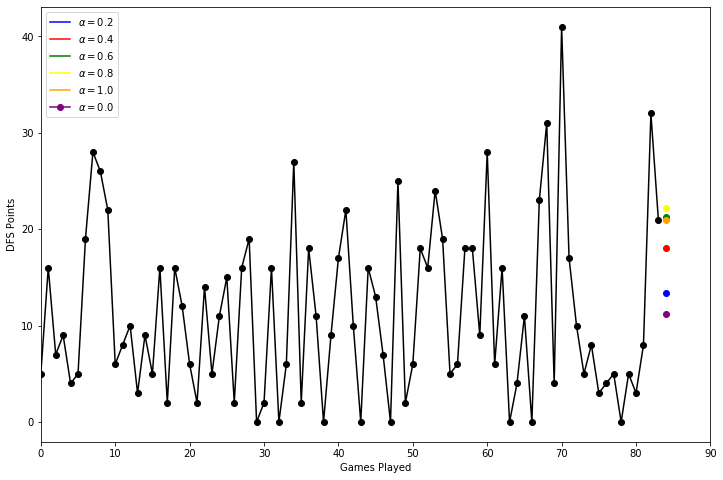

Mike Trout Daily Fantasy Points on DraftKings in 2019


In [112]:
ax = test_df['DFS(DK)'].plot(marker='o', color='black', figsize=(12,8))
ax.set_xlabel('Games Played')
ax.set_ylabel('DFS Points')

fcast1.plot(marker='o', color='blue', legend=True)
#fit1.fittedvalues.plot(marker='o',  color='blue')

fcast2.plot(marker='o', color='red', legend=True)
#fit2.fittedvalues.plot(marker='o',  color='red')

fcast3.plot(marker='o', color='green', legend=True)
#fit3.fittedvalues.plot(marker='o',  color='green')

fcast4.plot(marker='o', color='yellow', legend=True)
#fit4.fittedvalues.plot(marker='o',  color='yellow')

fcast5.plot(marker='o', color='orange', legend=True)
#fit5.fittedvalues.plot(marker='o',  color='orange')

fcast6.plot(marker='o', color='purple', legend=True).set_xlim(0,90)
#fit6.fittedvalues.plot(marker='o',  color='purple')


plt.show()
print('Mike Trout Daily Fantasy Points on DraftKings in 2019')

In [119]:
import numpy as np

In [121]:
SES_results_df = pd.DataFrame(np.c_[fit1.fittedvalues, fit2.fittedvalues,
                                   fit3.fittedvalues, fit4.fittedvalues,
                                   fit5.fittedvalues, fit6.fittedvalues,
                                   test_df['DFS(DK)']], 
                              columns=['fit1', 'fit2', 'fit3', 'fit4', 
                                      'fit5', 'fit6', 'actuals'])
SES_results_df

,fit1,fit2,fit3,fit4,fit5,fit6,actuals
0,5.000000,5.000000,5.000000,5.000000,5.0,11.249999,5.0
1,5.000000,5.000000,5.000000,5.000000,5.0,11.249999,16.0
2,7.200000,9.400000,11.600000,13.800000,16.0,11.249999,7.0
3,7.160000,8.440000,8.840000,8.360000,7.0,11.249999,9.0
4,7.528000,8.664000,8.936000,8.872000,9.0,11.249999,4.0
5,6.822400,6.798400,5.974400,4.974400,4.0,11.249999,5.0
6,6.457920,6.079040,5.389760,4.994880,5.0,11.249999,19.0
7,8.966336,11.247424,13.555904,16.198976,19.0,11.249999,28.0
8,12.773069,17.948454,22.222362,25.639795,28.0,11.249999,26.0
9,15.418455,21.169073,24.488945,25.927959,26.0,11.249999,22.0


In [126]:
SES_errors_df = pd.DataFrame()
SES_errors_df['fit1_error'] = SES_results_df['fit1'] - SES_results_df['actuals']
SES_errors_df['fit2_error'] = SES_results_df['fit2'] - SES_results_df['actuals']
SES_errors_df['fit3_error'] = SES_results_df['fit3'] - SES_results_df['actuals']
SES_errors_df['fit4_error'] = SES_results_df['fit4'] - SES_results_df['actuals']
SES_errors_df['fit5_error'] = SES_results_df['fit5'] - SES_results_df['actuals']
SES_errors_df['fit6_error'] = SES_results_df['fit6'] - SES_results_df['actuals']
SES_errors_df

,fit1_error,fit2_error,fit3_error,fit4_error,fit5_error,fit6_error
0,0.000000,0.000000,0.000000,0.000000,0.0,6.249999
1,-11.000000,-11.000000,-11.000000,-11.000000,-11.0,-4.750001
2,0.200000,2.400000,4.600000,6.800000,9.0,4.249999
3,-1.840000,-0.560000,-0.160000,-0.640000,-2.0,2.249999
4,3.528000,4.664000,4.936000,4.872000,5.0,7.249999
5,1.822400,1.798400,0.974400,-0.025600,-1.0,6.249999
6,-12.542080,-12.920960,-13.610240,-14.005120,-14.0,-7.750001
7,-19.033664,-16.752576,-14.444096,-11.801024,-9.0,-16.750001
8,-13.226931,-8.051546,-3.777638,-0.360205,2.0,-14.750001
9,-6.581545,-0.830927,2.488945,3.927959,4.0,-10.750001


In [147]:
SES_MAE_df = [SES_errors_df.fit1_error.abs().sum() / SES_errors_df.fit1_error.count(),
             SES_errors_df.fit2_error.abs().sum() / SES_errors_df.fit2_error.count(),
             SES_errors_df.fit3_error.abs().sum() / SES_errors_df.fit3_error.count(),
             SES_errors_df.fit4_error.abs().sum() / SES_errors_df.fit4_error.count(),
             SES_errors_df.fit5_error.abs().sum() / SES_errors_df.fit5_error.count(),
             SES_errors_df.fit6_error.abs().sum() / SES_errors_df.fit6_error.count()]
SES_MAE_df

[7.876477043822508,
 8.074818647749211,
 8.336288215566904,
 8.849863568342744,
 9.738095238095237,
 7.440475982620986]

# KDE

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

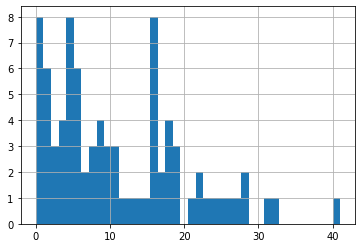

In [148]:
test_df['DFS(DK)'].hist(bins=40)

In [153]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [157]:
print("Package Versions:")
import sklearn; print("  scikit-learn:", sklearn.__version__)
import scipy; print("  scipy:", scipy.__version__)
import statsmodels; print("  statsmodels:", statsmodels.__version__)



Package Versions:
  scikit-learn: 0.21.2
  scipy: 1.2.1
  statsmodels: 0.10.0


### Bandwidth Cross-Validation in Scikit-Learn

In [163]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 5.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(test_df['DFS(DK)'][:, None])
print(grid.best_params_)



{'bandwidth': 3.1413793103448278}


C:\Users\Nicholas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
# instantiate and fit the KDE model
kde_skl = KernelDesnsity(bandwidth = grid.best_params_)
kde_skl.fit(test_df['DFS(DK)'])
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper left')
ax.set_xlim(-4.5, 3.5);



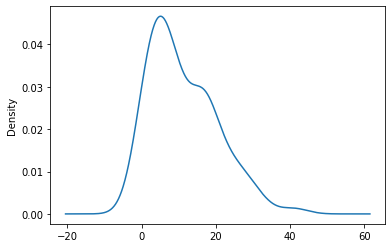

In [164]:
test_df['DFS(DK)'].plot.kde()

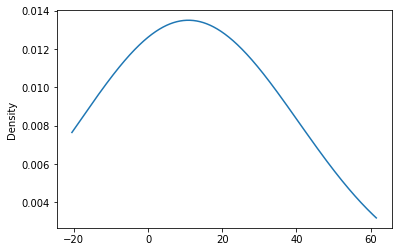

In [165]:
test_df['DFS(DK)'].plot.kde(bw_method=3.14)

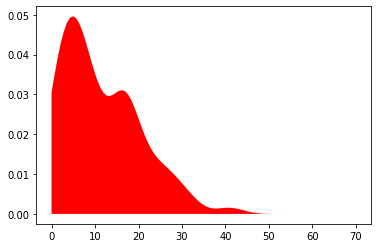

In [242]:
import matplotlib.pyplot as plt

test_X = np.array(test_df['DFS(DK)'])[:, np.newaxis]
X_plot = np.linspace(0,70,100)[:,np.newaxis]

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=3.14).fit(test_X)
log_dens = kde.score_samples(X_plot)

X_plot = np.insert(X_plot, 0, 0, axis=0)
log_dens = np.exp(log_dens)
log_dens = np.insert(log_dens, 0, 0, axis=0)

plt.fill(X_plot[:, 0], log_dens, fc='red')
